In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import  seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

Q2.1.1

In [204]:
df = pd.read_excel('bakers_yeast_reference_batches.xlsx')
df

,Unnamed: 0,Primary ID,BatchID,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
0,249,250,bb,0.000000,0.05059,31.9580,212.32800,6.16453,1382.19,43.4194,5.85607
1,250,251,bb,0.166667,0.04930,31.5303,835.47600,29.78270,2084.42,43.4853,5.34603
2,251,252,bb,0.333333,0.04973,30.8220,910.15500,32.50710,2266.47,43.5628,5.18718
3,252,253,bb,0.500000,0.04915,30.1617,985.01100,36.37100,2446.84,43.6002,5.18043
4,253,254,bb,0.666667,0.04744,29.8891,1052.45000,39.26990,2636.96,43.6572,5.18145
...,...,...,...,...,...,...,...,...,...,...,...
1323,2568,2569,Xa,13.000000,0.00784,32.6918,386.12800,0.01424,6736.81,57.3615,6.15868
1324,2569,2570,Xa,13.166700,0.00652,32.7386,96.28380,0.00000,6742.49,57.4025,6.25613
1325,2570,2571,Xa,13.333300,0.00643,32.8174,44.09750,0.00712,6734.69,57.2948,6.31553
1326,2571,2572,Xa,13.500000,0.00644,32.8268,10.43010,-0.00356,6202.63,57.3891,6.34270


In [205]:
len(df.groupby('BatchID')['BatchID'].count())

16

In [206]:
df.groupby('BatchID')['Time'].max() - df.groupby('BatchID')['Time'].min()

BatchID
Ma    13.6667
Na    13.6667
Ta    13.6667
Va    13.6667
Xa    13.6667
bb    13.6667
cb    13.6667
db    13.6667
eb    13.6667
fb    13.6667
gb    13.6667
hb    13.6667
ib    13.6667
jb    13.6667
kb    13.6667
lb    13.6667
Name: Time, dtype: float64

In [207]:
df.groupby('BatchID')['BatchID'].count()

BatchID
Ma    83
Na    83
Ta    83
Va    83
Xa    83
bb    83
cb    83
db    83
eb    83
fb    83
gb    83
hb    83
ib    83
jb    83
kb    83
lb    83
Name: BatchID, dtype: int64

There are 16 different batches in this data.

Each batch has duration of 13.667.

There are 83 data points for each batch.

There are 8 variables measured including time (Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH).


Q2.1.2

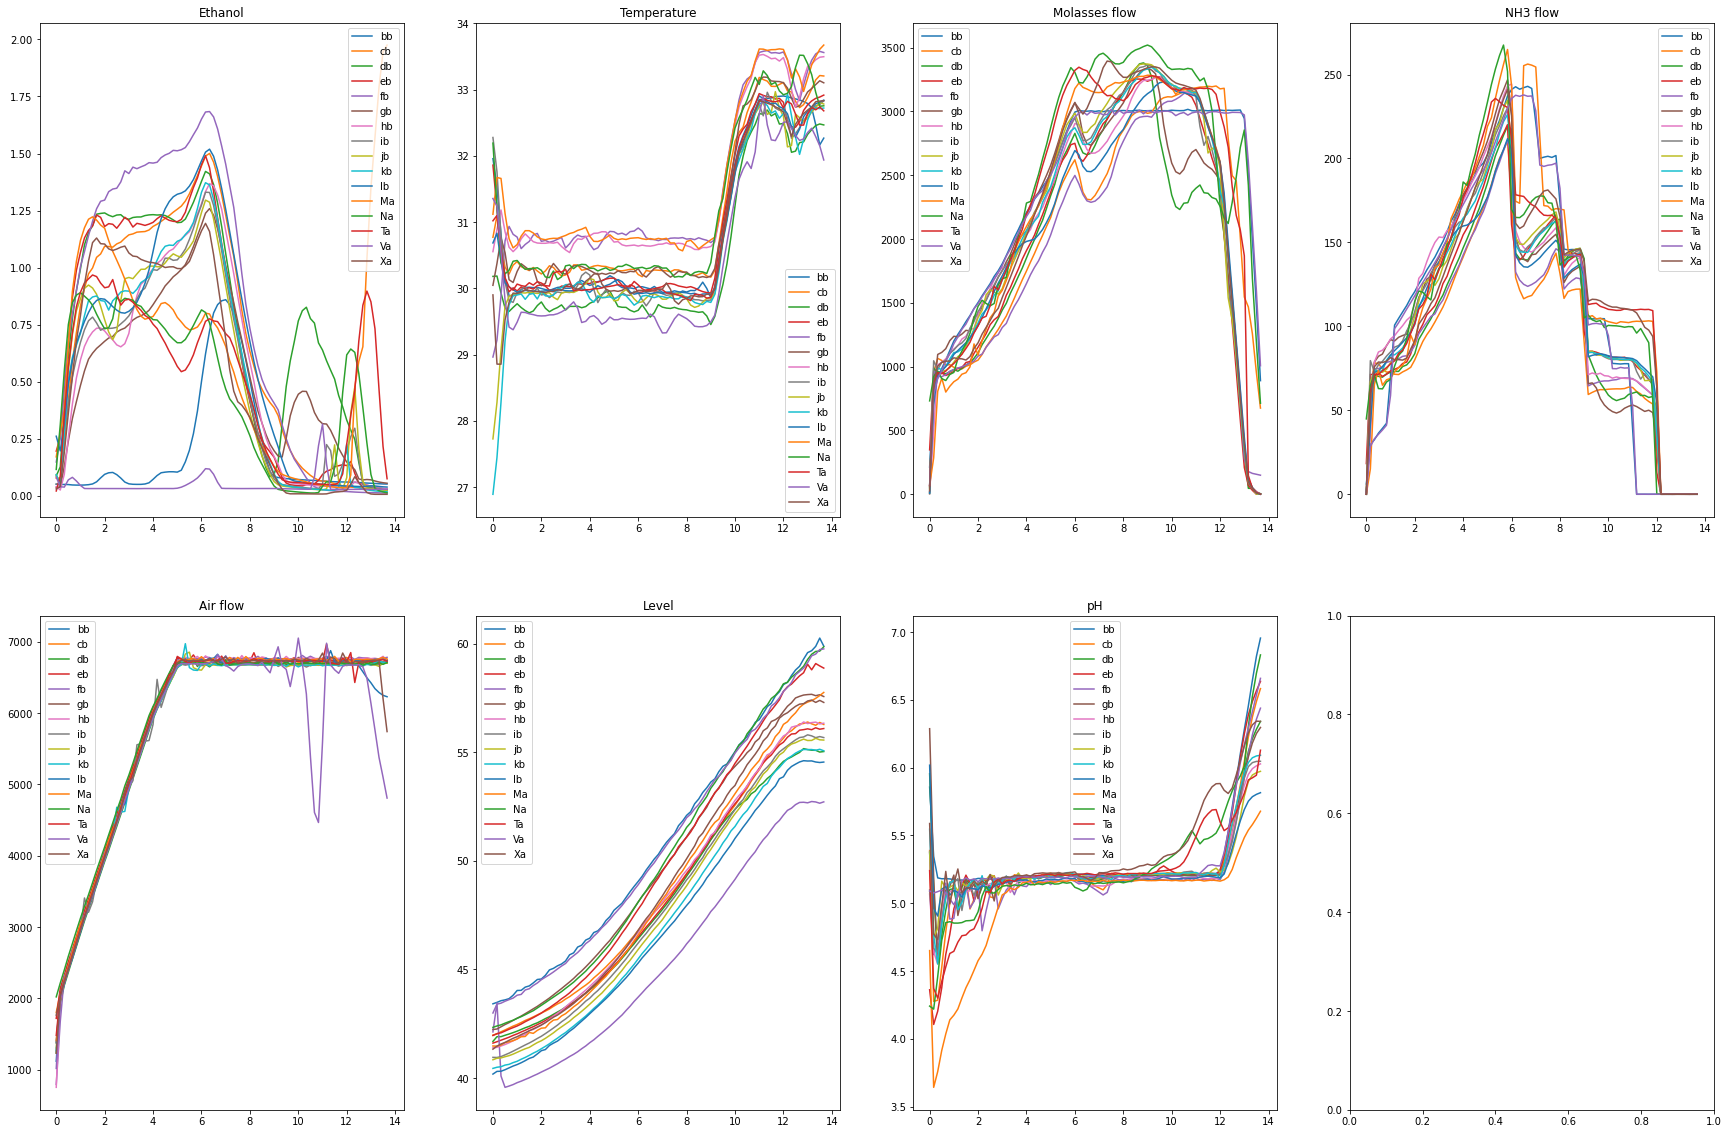

In [208]:
fig, axs = plt.subplots(2, 4,figsize=(30, 20))
for batch in df.BatchID.unique():
    temp = df[df.BatchID==batch]
    axs[0, 0].plot(temp['Time'],temp['Ethanol'],label=batch)
    axs[0, 0].set_title('Ethanol')
    axs[0, 0].legend()
    
    axs[0, 1].plot(temp['Time'],temp['Temperature'],label=batch)
    axs[0, 1].set_title('Temperature')
    axs[0, 1].legend()
    
    axs[0, 2].plot(temp['Time'],temp['Molasses flow'],label=batch)
    axs[0, 2].set_title('Molasses flow')
    axs[0, 2].legend()
    
    axs[0, 3].plot(temp['Time'],temp['NH3 flow'],label=batch)
    axs[0, 3].set_title('NH3 flow')
    axs[0, 3].legend()
    
    axs[1, 0].plot(temp['Time'],temp['Air flow'],label=batch)
    axs[1, 0].set_title('Air flow')
    axs[1, 0].legend()
    
    axs[1, 1].plot(temp['Time'],temp['Level'],label=batch)
    axs[1, 1].set_title('Level')
    axs[1, 1].legend()
    
    axs[1, 2].plot(temp['Time'],temp['pH'],label=batch)
    axs[1, 2].set_title('pH')
    axs[1, 2].legend()


In the graghs above, we can observes some potential outliers: 

Graph of Ethanol, purple and blue lines indicate Va and bb are very low in (2,8).

Graph of PH, orange line indicate Ma is low in range(1,2).

Graph of Air flow, the purple line indicate Va is lower than the others around 11 and 14.

The variables Ethanol has largest variability. Temperature around (9,11), Air flow and pH around (2,12) has all the batches tight together.

Q2.1.3

In [209]:
# drop columns that we will not use
df.drop( columns = ['Unnamed: 0', 'Primary ID'], inplace = True)
df.set_index('BatchID', inplace=True)
df

,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
BatchID,,,,,,,,
bb,0.000000,0.05059,31.9580,212.32800,6.16453,1382.19,43.4194,5.85607
bb,0.166667,0.04930,31.5303,835.47600,29.78270,2084.42,43.4853,5.34603
bb,0.333333,0.04973,30.8220,910.15500,32.50710,2266.47,43.5628,5.18718
bb,0.500000,0.04915,30.1617,985.01100,36.37100,2446.84,43.6002,5.18043
bb,0.666667,0.04744,29.8891,1052.45000,39.26990,2636.96,43.6572,5.18145
...,...,...,...,...,...,...,...,...
Xa,13.000000,0.00784,32.6918,386.12800,0.01424,6736.81,57.3615,6.15868
Xa,13.166700,0.00652,32.7386,96.28380,0.00000,6742.49,57.4025,6.25613
Xa,13.333300,0.00643,32.8174,44.09750,0.00712,6734.69,57.2948,6.31553


In [210]:
scaler = StandardScaler()
batch_scaled = scaler.fit_transform(df)
batch_scaled

array([[-1.71130681, -1.04011805,  0.84597751, ..., -3.10825991,
        -0.96636672,  1.90190383],
       [-1.66956753, -1.042825  ,  0.50253889, ..., -2.61974424,
        -0.954013  ,  0.32731927],
       [-1.62782851, -1.04192268, -0.06621858, ..., -2.49309872,
        -0.93948474, -0.16307905],
       ...,
       [ 1.62781988, -1.13278386,  1.53606669, ...,  0.61527817,
         1.63473666,  3.32033889],
       [ 1.66956742, -1.13276288,  1.54361479, ...,  0.24514353,
         1.65241428,  3.40421753],
       [ 1.71131495, -1.13269993,  1.54787064, ..., -0.07730339,
         1.63473666,  3.3977962 ]])

In [211]:
pca = PCA(n_components=5, svd_solver='full')
pca_scores = pca.fit_transform(batch_scaled)
pca_scores.shape

(1328, 5)

In [212]:
scores_pd = pd.DataFrame(data = pca_scores
                         ,columns = ['PC1', 'PC2', 'PC3','PC4','PC5']
                         ,index = df.index)
scores_pd

,PC1,PC2,PC3,PC4,PC5
BatchID,,,,,
bb,-0.808176,4.508288,-0.200368,1.295502,-0.754945
bb,-1.303347,3.391210,0.824346,0.666865,-0.552935
bb,-1.630004,3.073121,1.085677,0.706676,-0.168488
bb,-1.790453,2.816650,1.059588,0.979711,0.160562
bb,-1.811100,2.636318,1.033483,1.094550,0.294213
...,...,...,...,...,...
Xa,3.772295,2.368292,-1.644665,0.830572,-0.163892
Xa,3.875235,2.595895,-1.942104,0.980115,-0.265168
Xa,3.963794,2.665704,-2.074648,1.041445,-0.323446


In [213]:
loadings_pd = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2', 'PC3','PC4','PC5']
                           ,index = df.columns)
loadings_pd

,PC1,PC2,PC3,PC4,PC5
Time,0.471425,-0.115005,-0.073487,-0.109928,0.166210
Ethanol,-0.315056,-0.164245,-0.630171,-0.587107,0.255200
Temperature,0.399243,0.203158,0.051128,-0.540846,-0.647797
Molasses flow,0.127401,-0.608623,0.366748,-0.045936,0.239382
NH3 flow,-0.254209,-0.542698,-0.115348,0.249949,-0.618487
Air flow,0.318021,-0.481637,-0.256120,-0.079962,-0.044048
Level,0.472402,-0.064508,0.060503,-0.001973,0.210803
pH,0.337563,0.132078,-0.614657,0.528890,-0.037395


The scores and loading table are shown above

Q2.1.4

In [214]:
# add time back to score table
scores_pd['Time']=df['Time']
#scores_pd['Time']=batch_scaled[:,0]
scores_pd

,PC1,PC2,PC3,PC4,PC5,Time
BatchID,,,,,,
bb,-0.808176,4.508288,-0.200368,1.295502,-0.754945,0.000000
bb,-1.303347,3.391210,0.824346,0.666865,-0.552935,0.166667
bb,-1.630004,3.073121,1.085677,0.706676,-0.168488,0.333333
bb,-1.790453,2.816650,1.059588,0.979711,0.160562,0.500000
bb,-1.811100,2.636318,1.033483,1.094550,0.294213,0.666667
...,...,...,...,...,...,...
Xa,3.772295,2.368292,-1.644665,0.830572,-0.163892,13.000000
Xa,3.875235,2.595895,-1.942104,0.980115,-0.265168,13.166700
Xa,3.963794,2.665704,-2.074648,1.041445,-0.323446,13.333300


In [215]:
tb = pd.pivot_table(scores_pd,values=['PC1', 'PC2', 'PC3','PC4','PC5'],index='Time',columns='BatchID')
tb

PC1                                                    \
BatchID          Ma        Na        Ta        Va        Xa        bb   
Time                                                                    
0.000000  -2.575226 -2.494768 -1.834810 -1.935067 -1.953438 -0.808176   
0.166667  -3.406333 -2.944182 -2.731785 -1.704701 -3.044833 -1.303347   
0.333333  -3.390333 -3.070940 -3.117042 -1.841620 -3.172201 -1.630004   
0.500000  -3.534499 -2.888284 -3.194946 -2.016330 -2.751431 -1.790453   
0.666667  -3.596972 -2.732277 -3.165646 -2.107667 -2.436144 -1.811100   
...             ...       ...       ...       ...       ...       ...   
13.000000  2.489762  4.277071  3.184812  4.033208  3.772295  4.373225   
13.166700  2.481818  4.552587  3.157697  4.097282  3.875235  4.485736   
13.333300  2.421492  4.641010  3.372776  4.055942  3.963794  4.556764   
13.500000  2.397535  4.702980  3.579729  4.048033  3.900935  4.617689   
13.666700  2.442108  4.826890  3.850841  3.985137  3.808085  4.695344   

                                                   ...       PC5            \
BatchID          cb        db        eb        fb  ...        cb        db   
Time                                               ...                       
0.000000  -1.732160 -1.483465 -2.607604 -2.574646  ... -0.132314  0.132039   
0.166667  -2.818163 -2.245863 -3.134312 -3.146375  ... -0.526101  0.060107   
0.333333  -3.018590 -3.095891 -3.340362 -3.181104  ... -0.346720  0.127723   
0.500000  -2.938017 -3.043336 -3.349177 -2.775636  ... -0.083581  0.355656   
0.666667  -2.735993 -2.909978 -3.199772 -2.511582  ...  0.060130  0.456512   
...             ...       ...       ...       ...  ...       ...       ...   
13.000000  3.610527  3.231240  3.730375  3.293611  ... -0.289543 -0.039956   
13.166700  3.812695  3.385515  3.900761  3.531415  ... -0.436381 -0.158290   
13.333300  4.008694  3.523197  4.035689  3.730366  ... -0.528557 -0.196414   
13.500000  4.187002  3.613033  4.143437  3.877819  ... -0.574028 -0.223224   
13.666700  4.289330  3.696612  4.246451  3.984240  ... -0.582936 -0.218157   

                                                                       \
BatchID          eb        fb        gb        hb        ib        jb   
Time                                                                    
0.000000  -0.617059  0.897800  0.128482  0.009076 -0.914290  1.438659   
0.166667  -0.570277  0.552050 -0.165896 -0.371143 -1.111206  0.774914   
0.333333  -0.087732  0.075650 -0.462843 -0.755104 -0.431340  0.456887   
0.500000   0.197882 -0.306487 -0.344080 -0.594513 -0.052315  0.199308   
0.666667   0.370031 -0.384769 -0.106633 -0.404393  0.123296  0.218693   
...             ...       ...       ...       ...       ...       ...   
13.000000 -0.292699 -0.656136 -0.236875 -0.491489 -0.158960 -0.126855   
13.166700 -0.372398 -0.775162 -0.341100 -0.588635 -0.269508 -0.242682   
13.333300 -0.404784 -0.839552 -0.399807 -0.637534 -0.309537 -0.286531   
13.500000 -0.430634 -0.870686 -0.438777 -0.664983 -0.323551 -0.338967   
13.666700 -0.446849 -0.863928 -0.430286 -0.667053 -0.351098 -0.322251   

                               
BatchID          kb        lb  
Time                           
0.000000   1.833015 -0.111854  
0.166667   1.236314 -0.332924  
0.333333   0.850361 -0.270976  
0.500000   0.471139 -0.038183  
0.666667   0.224946  0.038438  
...             ...       ...  
13.000000 -0.147775 -0.175886  
13.166700 -0.292980 -0.289735  
13.333300 -0.326307 -0.334636  
13.500000 -0.322784 -0.355440  
13.666700 -0.327004 -0.367125  

[83 rows x 80 columns]

Above is the pivot table of all the values of batches in each PC along time

Q2.1.5

In [216]:
def myplot(scores,loadings,loading_labels=None,score_labels=None):
    # adjusting the scores to fit in (-1,1)
    for batch in df.index.unique():
        xt = scores['PC1'][batch]
        yt = scores['PC2'][batch]
        n = loadings.shape[0]
        scalext = 1.0/(xt.max() - xt.min())
        scaleyt = 1.0/(yt.max() - yt.min())
        xt_scaled = xt * scalext
        yt_scaled = yt * scaleyt
        # adjusting the loadings to fit in (-1,1)
        p = loadings
        p_scaled = MaxAbsScaler().fit_transform(p)
               
        plt.plot(xt_scaled, yt_scaled,label=batch)
        plt.legend()
    
    #plt.scatter(xs * scalex,ys * scaley, s=10)
    
    
#     for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T,score_labels):
#         #plt.plot(x, y, label)
#         plt.text(x, y, label, ha='center', size=11)
#         if (label == 'Llanedyrn'):
#             plt.text(x, y, label, ha='center', size=11,color = 'r')
#         elif (label == 'Caldicot'):
#             plt.text(x, y, label, ha='center', size=11,color = 'g')
#         elif (label == 'IsleThorns'):
#             plt.text(x, y, label, ha='center', size=11,color = 'b')
#         else:
#             plt.text(x, y, label, ha='center', size=11,color = 'y')
    
    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5)
        if loading_labels is None:
            plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'r', ha = 'center', va = 'center', size=16)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()

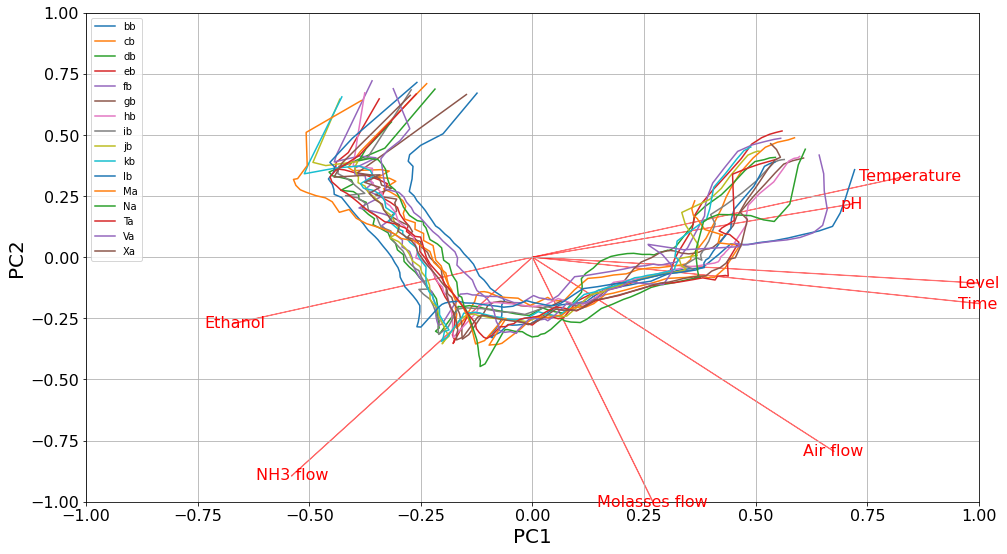

In [217]:
plt.rcParams["figure.figsize"] = [16,9]
myplot(tb,loadings_pd.iloc[:,:2],loading_labels=loadings_pd.index,score_labels=tb.index)
plt.show()

Q2.1.6

In the above score-loading plot, we can first determine that as time goes by, the plot go from top-left(forth quarter) to top-right(first quarter), since the arrow for 'Time' points to the right, and we can know that Time has strong positive influence on PC1.

In addition, pH,Temperature, Level has strong positive relationship with PC1, Ethanol has strong negative relationship with PC1. Molasses flow has weak influence on PC1, but strong negative influence on PC2.

Before the kink, which is at the first phase, (Ethanol, NH3-flow) are relatively high of each batch, while (pH,Temperature, Level) are relatively low. In this period, these (Ethanol, NH3-flow,pH,Temperature, Level) does not change significantly, while (Molasses flow, Air flow) are growing positively.

The kink might be caused by a sudden increase in NH3-flow, because I can observe a little 'angle/peak' around the kink in most of the lines, and the sudden 'peak' goes towards positive side of NH3-flow.

After the kink, the graph starts going to the top right -- second phase, (Molasses flow, Air flow) become stable, while (Ethanol, NH3-flow) decreasing and (pH,Temperature, Level) increasing along time.

Q2.1.7

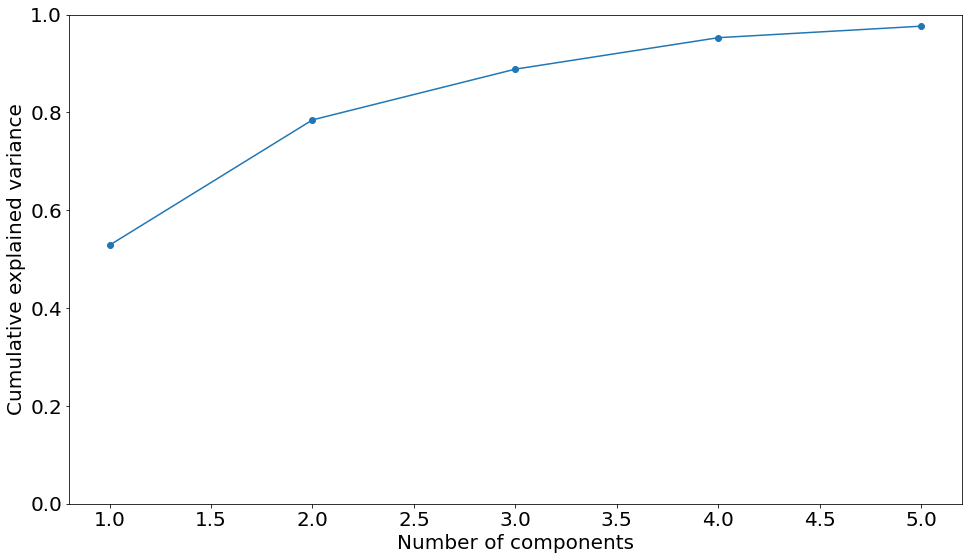

In [218]:
plt.plot(range(1,pca.n_components+1), np.cumsum(pca.explained_variance_ratio_),'-o')
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Cumulative explained variance',fontsize=20);
plt.tick_params(labelsize=20)
plt.ylim(0,1)
plt.show()

In [219]:
np.cumsum(pca.explained_variance_ratio_*100)

array([52.86013109, 78.46737654, 88.84335139, 95.27196483, 97.62535303])

From above, the first component explained 52.86% of the model variace. 

First two components explained 78.47% of the model variance.

# Q2.2

Q2.2.1

In [220]:
df2 = pd.read_excel('todays_batches.xlsx')
df2

,Unnamed: 0,Primary ID,BatchID,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
0,2573,2574,Ya,0.000000,0.30350,29.0885,-0.70954,0.00356,1250.69,41.9216,4.86282
1,2574,2575,Ya,0.166667,0.41224,29.5509,-1.49002,0.00712,2040.08,41.9911,4.00324
2,2575,2576,Ya,0.333333,1.16614,29.9639,-1.63193,0.00712,2235.08,42.3624,4.05839
3,2576,2577,Ya,0.500000,2.22696,29.9746,1280.07000,82.08680,2419.08,42.8531,4.35465
4,2577,2578,Ya,0.666667,3.13590,29.9466,844.09600,74.65800,2603.53,43.2146,4.76967
...,...,...,...,...,...,...,...,...,...,...,...
161,2734,2735,Za,13.000000,0.01637,33.2882,301.55000,0.05000,6794.76,57.2191,6.38039
162,2735,2736,Za,13.166700,0.01575,33.3834,161.95900,0.04286,6820.50,57.2289,6.48979
163,2736,2737,Za,13.333300,0.01512,33.4438,75.58330,0.03214,6698.80,57.2021,6.55989
164,2737,2738,Za,13.500000,0.01444,33.4531,61.79870,0.06429,6775.14,57.0425,6.59559


In [221]:
# drop columns that we will not use
df2.drop( columns = ['Unnamed: 0', 'Primary ID'], inplace = True)
df2.set_index('BatchID', inplace=True)
df2

,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
BatchID,,,,,,,,
Ya,0.000000,0.30350,29.0885,-0.70954,0.00356,1250.69,41.9216,4.86282
Ya,0.166667,0.41224,29.5509,-1.49002,0.00712,2040.08,41.9911,4.00324
Ya,0.333333,1.16614,29.9639,-1.63193,0.00712,2235.08,42.3624,4.05839
Ya,0.500000,2.22696,29.9746,1280.07000,82.08680,2419.08,42.8531,4.35465
Ya,0.666667,3.13590,29.9466,844.09600,74.65800,2603.53,43.2146,4.76967
...,...,...,...,...,...,...,...,...
Za,13.000000,0.01637,33.2882,301.55000,0.05000,6794.76,57.2191,6.38039
Za,13.166700,0.01575,33.3834,161.95900,0.04286,6820.50,57.2289,6.48979
Za,13.333300,0.01512,33.4438,75.58330,0.03214,6698.80,57.2021,6.55989


In [222]:
today_scaled = scaler.transform(df2)
pca_scores = pca.transform(today_scaled)
pca_scores.shape

(166, 5)

In [223]:
scores_pd2 = pd.DataFrame(data = pca_scores
                         ,columns = ['PC1', 'PC2', 'PC3','PC4','PC5']
                         ,index = df2.index)
scores_pd2

,PC1,PC2,PC3,PC4,PC5
BatchID,,,,,
Ya,-3.096781,3.798958,1.166746,0.602916,0.937231
Ya,-3.715861,3.216763,2.529801,-1.183846,0.839431
Ya,-3.928722,2.972255,1.411527,-2.217525,1.037556
Ya,-4.362027,1.145315,-0.230988,-2.807162,1.130690
Ya,-4.476710,1.268811,-2.409623,-3.259502,1.559791
...,...,...,...,...,...
Za,4.177559,2.589581,-2.097027,0.924135,-0.524341
Za,4.329929,2.726441,-2.361650,1.062921,-0.615614
Za,4.401519,2.857172,-2.506579,1.158278,-0.667658


In [224]:
loadings_pd2 = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2', 'PC3','PC4','PC5']
                           ,index = df2.columns)
loadings_pd2

,PC1,PC2,PC3,PC4,PC5
Time,0.471425,-0.115005,-0.073487,-0.109928,0.166210
Ethanol,-0.315056,-0.164245,-0.630171,-0.587107,0.255200
Temperature,0.399243,0.203158,0.051128,-0.540846,-0.647797
Molasses flow,0.127401,-0.608623,0.366748,-0.045936,0.239382
NH3 flow,-0.254209,-0.542698,-0.115348,0.249949,-0.618487
Air flow,0.318021,-0.481637,-0.256120,-0.079962,-0.044048
Level,0.472402,-0.064508,0.060503,-0.001973,0.210803
pH,0.337563,0.132078,-0.614657,0.528890,-0.037395


The scores and loading table are shown above

In [225]:
# add time back to score table
#scores_pd2['Time']=today_scaled[:,0]
scores_pd2['Time']=df2['Time']
scores_pd2

,PC1,PC2,PC3,PC4,PC5,Time
BatchID,,,,,,
Ya,-3.096781,3.798958,1.166746,0.602916,0.937231,0.000000
Ya,-3.715861,3.216763,2.529801,-1.183846,0.839431,0.166667
Ya,-3.928722,2.972255,1.411527,-2.217525,1.037556,0.333333
Ya,-4.362027,1.145315,-0.230988,-2.807162,1.130690,0.500000
Ya,-4.476710,1.268811,-2.409623,-3.259502,1.559791,0.666667
...,...,...,...,...,...,...
Za,4.177559,2.589581,-2.097027,0.924135,-0.524341,13.000000
Za,4.329929,2.726441,-2.361650,1.062921,-0.615614,13.166700
Za,4.401519,2.857172,-2.506579,1.158278,-0.667658,13.333300


In [226]:
tb2 = pd.pivot_table(scores_pd2,values=['PC1', 'PC2', 'PC3','PC4','PC5'],index='Time',columns='BatchID')
tb2

PC1                 PC2                 PC3            \
BatchID          Ya        Za        Ya        Za        Ya        Za   
Time                                                                    
0.000000  -3.096781 -0.660359  3.798958  4.613764  1.166746 -1.802298   
0.166667  -3.715861 -2.032155  3.216763  2.849667  2.529801  0.423385   
0.333333  -3.928722 -2.734359  2.972255  2.229773  1.411527  1.511814   
0.500000  -4.362027 -2.523621  1.145315  2.247428 -0.230988  0.916732   
0.666667  -4.476710 -2.356751  1.268811  2.592231 -2.409623  0.100159   
...             ...       ...       ...       ...       ...       ...   
13.000000  1.684309  4.177559  1.398034  2.589581 -1.259476 -2.097027   
13.166700  1.770673  4.329929  1.426290  2.726441 -1.244740 -2.361650   
13.333300  1.869276  4.401519  1.470466  2.857172 -1.198562 -2.506579   
13.500000  1.932977  4.462603  1.699221  2.853649 -1.276991 -2.596933   
13.666700  1.646827  4.510675  2.394997  2.868612 -1.234926 -2.633580   

                PC4                 PC5            
BatchID          Ya        Za        Ya        Za  
Time                                               
0.000000   0.602916  2.854773  0.937231 -0.030840  
0.166667  -1.183846  1.492080  0.839431  0.011713  
0.333333  -2.217525 -0.031252  1.037556 -0.072634  
0.500000  -2.807162 -0.437946  1.130690 -0.224712  
0.666667  -3.259502 -0.325745  1.559791 -0.049787  
...             ...       ...       ...       ...  
13.000000 -2.095856  0.924135  0.405520 -0.524341  
13.166700 -1.915758  1.062921  0.421113 -0.615614  
13.333300 -1.773398  1.158278  0.404415 -0.667658  
13.500000 -1.577216  1.205385  0.316969 -0.682489  
13.666700 -1.173403  1.236215  0.343897 -0.672140  

[83 rows x 10 columns]

Q2.2.2

In [236]:
def myplot(scores,scores2,loadings,loading_labels=None,score_labels=None):
    # adjusting the scores to fit in (-1,1)
    for batch in df.index.unique():
        xt = scores['PC1'][batch]
        yt = scores['PC2'][batch]
        n = loadings.shape[0]
        scalext = 1.0/(xt.max() - xt.min())
        scaleyt = 1.0/(yt.max() - yt.min())
        xt_scaled = xt * scalext
        yt_scaled = yt * scaleyt
        
               
        plt.plot(xt_scaled, yt_scaled,c='b')
        
    for batch in df2.index.unique():
        xt = scores2['PC1'][batch]
        yt = scores2['PC2'][batch]
        n = loadings.shape[0]
        scalext = 1.0/(xt.max() - xt.min())
        scaleyt = 1.0/(yt.max() - yt.min())
        xt_scaled = xt * scalext
        yt_scaled = yt * scaleyt
        
               
        plt.plot(xt_scaled, yt_scaled,'--',label=batch)
        plt.legend()
    
    # adjusting the loadings to fit in (-1,1)
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)
    
    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5)
        if loading_labels is None:
            plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'r', ha = 'center', va = 'center', size=16)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()

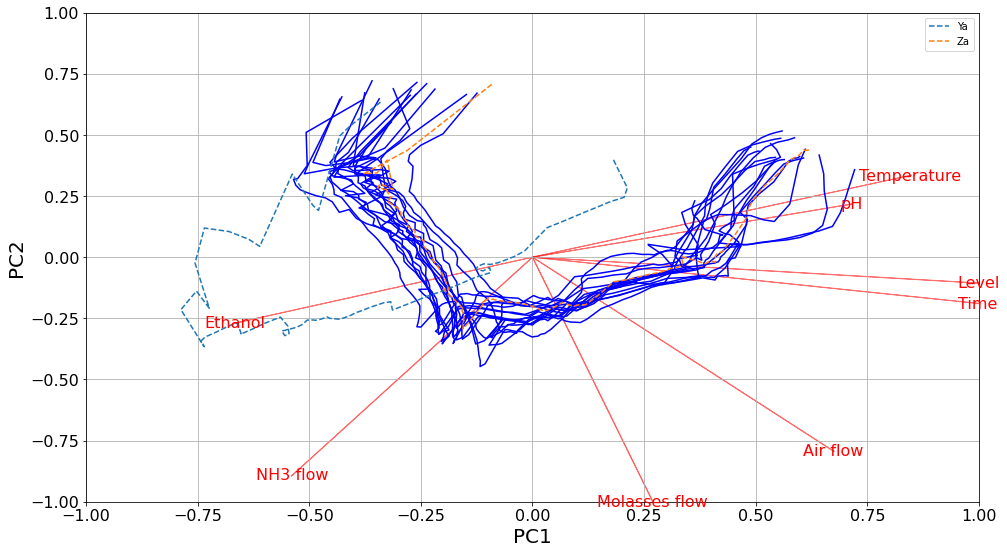

In [237]:
plt.rcParams["figure.figsize"] = [16,9]
myplot(tb,tb2,loadings_pd.iloc[:,:2],loading_labels=loadings_pd.index,score_labels=scores_pd.index)
plt.show()

Q2.2.3

The batch of 'Za' show similar behaviour to the reference ones, it does not have significant outliers.

On the other hand, 'Ya' is very defferent from and the previous ones. In the first phase before kink, it has increase in (Ethanol, NH3 flow), decrease in (pH,Temperature,Level). The (Molasses flow, Air flow) are much more stable.